
Types: 30781
Tokens: 291400
TTR: 0.10563143445435827

Curve Fitting Coefficients:
15.42330033171634 0.6046576691856437


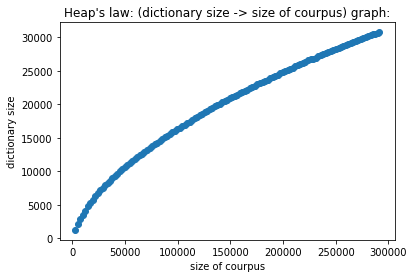

In [15]:
# import enchant
import csv
import re
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# d = enchant.Dict("en_US")

with open('tweets-dataset.csv', 'r', encoding="utf-8") as f:
	reader = csv.reader(f)
	your_list = list(reader)

# print(your_list)

newlist=[]
line=""

for i in your_list:
	for j in i:
		line = j
		# line = re.sub(r"@", " ", line)
		# line = re.sub(r"#", " ", line)
		line = re.sub(r"@[^\s]*", " ", line)
		line = re.sub(r"#[^\s]*", " ", line)
		line = re.sub(r"http[^\s]*", " ", line)
		line = re.sub(r"[^A-Za-z][^A-Za-z]*", " ", line)
		newlist+=[k.lower() for k in line.split()]

dic={}

for i in newlist:
	if i in dic.keys():
		dic[i]+=1
	else:
		dic[i]=1

print()
types = len(dic)
print("Types: "+str(types))
token = len(newlist)
print("Tokens: "+str(token))
print("TTR: "+str(types/token))
print()

### Heap's law plot

count = 0

plot=[[],[]]
voc=set()
ending=0
toks=0
while(True):
	linels=[]
	for i in range(200):
		try:
			line = your_list[count*200+i][0]
			line = re.sub(r"@[^\s]*", " ", line)
			line = re.sub(r"#[^\s]*", " ", line)
			line = re.sub(r"http[^\s]*", " ", line)
			line = re.sub(r"[^A-Za-z][^A-Za-z]*", " ", line)
			linels += [j.lower() for j in line.split()]
		except:
			ending=1
	count=count+1
	for j in linels:
		toks=toks+1
		voc.add(j)
	plot[0].append(toks)
	plot[1].append(len(voc))
	if ending:
		break

def func(x,a,b):
	return(a*(x**b))

# print()
# print(len(voc))
# print()

arrx = plot[0]
arry = plot[1]
# print(len(arrx),len(arry))
param, param_cov=curve_fit(func, np.array(arrx), np.array(arry))
print("Curve Fitting Coefficients:")
print(param[0],param[1])
plt.scatter(arrx, arry)
plt.title("Heap's law: (dictionary size -> size of courpus) graph:")
plt.xlabel("size of courpus")
plt.ylabel("dictionary size")
plt.show()


# following code is useful for ZIPF's law
# z=open("eng.txt","w+")
# lst = sorted(dic.items(), key = lambda kv:(kv[1], kv[0]))
# lst = lst[::-1]
# z.write("Rank  Word  Freq\n")
# for i in range(len(lst)):
# 	if d.check(lst[i][0]):
# 		z.write(str(i)+" "+lst[i][0]+" "+str(lst[i][1])+"\n")
# z.close()

Curve Fitting Constant Line:
y=0.8140325621332218


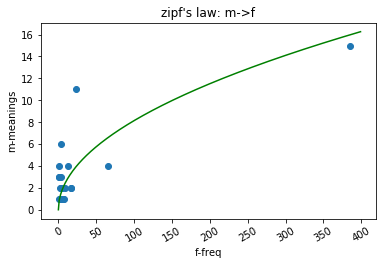

In [14]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

## following values are taken from eng.txt and https://dictionary.cambridge.org/dictionary/english/  E.G. 91 is rank of word "time" which has 15 meanings
m=[15, 4, 11, 2, 2, 4, 2, 1, 1, 2, 2, 6, 1, 3, 2, 1, 1, 3, 3, 4]
r=[91, 598, 1509, 2004, 2127, 2509, 3352, 4064, 4908, 5880, 6890, 7447, 7452, 7963, 9803, 9815, 13754, 15794, 18254, 30445]
f=[385, 66, 23, 17, 16, 13, 9, 7, 6, 5, 4, 3, 3, 3, 2, 2, 1, 1, 1 ,1]


arrx=["time","god","return","drama","conference","leader","request","resign","elimination","assault","currency","smoke","sky","motion","submit","strategy","yelling","surprises","process","adopt"]
# arry=[m[i]*((len(arrx[i]))**(1/2)) for i in range(20)]

arrm = m
arry = [(m[i]*((len(arrx[i]))**(1/2))) for i in range(20)]

def func(x,a):
	return(a*((x)**(1/2)))

param, param_cov=curve_fit(func, f, m)
ideal=[param[0]*((i)**(1/2)) for i in range(0,400)]


print("Curve Fitting Constant Line:")
print("a="+str(param[0]))

X=[i for i in range(0,400)]

plt.plot(X, ideal,color='green')
plt.scatter(f,m)
plt.xticks(rotation=30)
plt.title("zipf's law: m->f")
plt.ylabel("m-meanings")
plt.xlabel("f-freq")
plt.subplots_adjust(bottom=0.20)
plt.show()

Curve Fitting Constant Line:
y=9.623793598274847


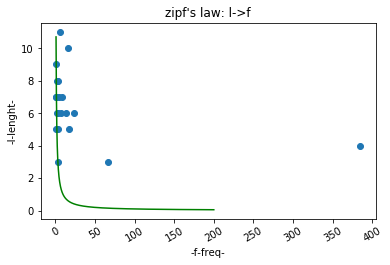

In [13]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

## following values are taken from eng.txt and https://dictionary.cambridge.org/dictionary/english/  E.G. 91 is rank of word "time" which has 15 meanings
m=[15, 4, 11, 2, 2, 4, 2, 1, 1, 2, 2, 6, 1, 3, 2, 1, 1, 3, 3, 4]
r=[91, 598, 1509, 2004, 2127, 2509, 3352, 4064, 4908, 5880, 6890, 7447, 7452, 7963, 9803, 9815, 13754, 15794, 18254, 30445]
f=[385, 66, 23, 17, 16, 13, 9, 7, 6, 5, 4, 3, 3, 3, 2, 2, 1, 1, 1 ,1]
arrx=["time","god","return","drama","conference","leader","request","resign","elimination","assault","currency","smoke","sky","motion","submit","strategy","yelling","surprises","process","adopt"]
# arry=[m[i]*((len(arrx[i]))**(1/2)) for i in range(20)]

l=[len(i) for i in arrx]

def func(x,a):
	return(a/x)

param, param_cov=curve_fit(func, f, l)
print("Curve Fitting Constant Line:")
print("a="+str(param[0]))

X=[(i/100) for i in range(90,20000)]
Y=[(param[0]/i) for i in X]

plt.scatter(f,l)
plt.xticks(rotation=30)
plt.plot(X, Y, color="green")
plt.title("zipf's law: l->f")
plt.ylabel("-l-lenght-")
plt.xlabel("-f-freq-")
plt.subplots_adjust(bottom=0.20)
plt.show()